# Comparison of Ordinary Least-Squares and Orthogonal Least Squares Regression
#### by Elizabeth Barnes

Comparing two ways of "fitting a straight line".

In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from scipy import stats, odr
import numpy.linalg as LA

#.............................................
# PLOTTING COMMANDS
#.............................................
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

We first need to setup our data. I am going to choose to have $x$ be a random normal variable and $y$ is just a linear function of $x$ but with some added Gaussian noise so that the fit is not perfect.

In [14]:
#setup my data
x = 5.*np.random.randn(50)
y = x+5.+3.*np.random.randn(len(x))

# substract the means to make things easier to visualize
x = x - np.mean(x)
y = y - np.mean(y)

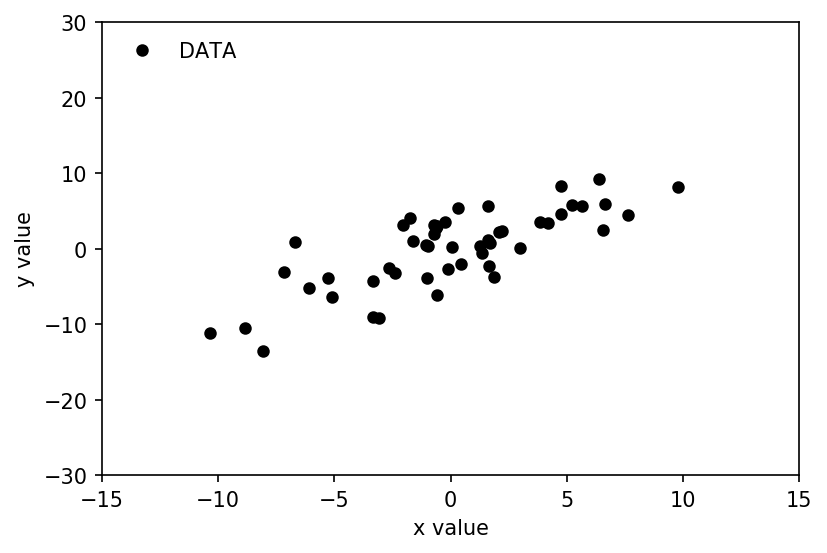

In [15]:
#plot the data points

plt.figure()
plt.plot(x,y,'ok',markersize = 5, label = 'DATA')
plt.ylabel('y value')
plt.xlabel('x value')
plt.legend(frameon = 0, loc = 'upper left')
plt.xlim([-15,15])
plt.ylim([-30, 30])

plt.show()

### Ordinary Least Squares Regression
Our next step is to fit a line through the data - where the line is determined using ordinary least squares regression (OLS).

In [ ]:
plt.figure()
plt.plot(x,y,'ok',markersize = 5, label = 'DATA')
plt.ylabel('y value')
plt.xlabel('x value')
plt.legend(frameon = 0, loc = 'upper left')
plt.xlim([-15,15])
plt.ylim([-30, 30])

# x versus y
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
x_plot = np.arange(-14,14,.1) #x-data for plotting line so it extends beyond the dots
plt.plot(x_plot,intercept+x_plot*slope,'-',color = 'cornflowerblue', label = 'LSQ: y vs x')
plt.legend()
plt.show()

If you had no reason to place make x the independent and y the dependent variable, you could imagine instead fitting an OLS line where y is the independent variable (and x the dependent). Below we do just that, but then we flip the line at the very end so that we can plot it on our same figure where the x value lies along the bottom axis (and the y value lies along the vertical axis).

In [ ]:
plt.figure()
plt.plot(x,y,'ok',markersize = 5, label = 'DATA')
plt.ylabel('y value')
plt.xlabel('x value')
plt.legend(frameon = 0, loc = 'upper left')
plt.xlim([-15,15])
plt.ylim([-30, 30])

# y versus x
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
x_plot = np.arange(-14,14,.1) #x-data for plotting line so it extends beyond the dots
plt.plot(x_plot,intercept+x_plot*slope,'-',color = 'cornflowerblue', label = 'LSQ: y vs x')

# x versus y
slope, intercept, r_value, p_value, std_err = stats.linregress(y,x)
plt.plot(x_plot,(1./slope)*x_plot - intercept/slope,'-',color = 'navy', label = 'LSQ: x vs y')
plt.legend(frameon = 0, loc = 'upper left', fontsize = 6)

plt.show()

Important! Notice how the two OLS lines _are not the same!_ That is, **your choice of which variable is the independent variable and which is the dependent variable matters!** 

To see why this is the case, below is a little illustration of what ordinary least squares regression is doing. Namely, it is trying to minimize the _vertical_ errors, and thus, flipping x and y makes a difference! (If this doesn't make sense, take a look at the orthogonal least squares example below and the difference should be more clear).

In [ ]:
xvals = (1,2,4,5)
yvals = (.2,2.9,2.9,5.9)

xplot = np.linspace(-15,15,100)

plt.figure(figsize=(3,3))
plt.plot(xvals,yvals,'ok',markersize = 5, label = 'data')
plt.ylabel('y')
plt.xlabel('x')

slope, intercept, r_value, p_value, std_err = stats.linregress(xvals,yvals)
plt.plot(xplot,xplot,'--')

for i,val in enumerate(xvals):
    plt.plot([val,val],[yvals[i],val])

plt.title('ordinary least squares')
plt.xlim([-2,8])
plt.ylim([-2,8])

frame1 = plt.gca()
frame1.axes.xaxis.set_ticks([])
frame1.axes.yaxis.set_ticks([])
plt.text(3,-1,'vertical offsets', style = 'italic')

plt.show()

### Orthogonal Least Squares regression
The solution is to use a different form of regression, called Orthogonal Least Squares regression. This method does not care which variable is the independent and which is the dependent (you get the same line either way).

In [ ]:
plt.figure()
plt.plot(x,y,'ok',markersize = 5, label = 'DATA')
plt.ylabel('y value')
plt.xlabel('x value')
plt.legend(frameon = 0, loc = 'upper left')

# y versus x
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
x_plot = np.arange(-14,14,.1) #x-data for plotting line so it extends beyond the dots
plt.plot(x_plot,intercept+x_plot*slope,'-',color = 'cornflowerblue', label = 'LSQ: y vs x')

# x versus y
slope, intercept, r_value, p_value, std_err = stats.linregress(y,x)
plt.plot(x_plot,(1./slope)*x_plot - intercept/slope,'-',color = 'navy', label = 'LSQ: x vs y')
plt.legend(frameon = 0, loc = 'upper left', fontsize = 6)

# fit orthogonal least squares regression line
C = np.cov([x,y], rowvar = 1)
LAM, E = LA.eig(C)

plt.plot(np.array([-E[0][1],E[0][1]])*30.,np.array([-E[1][1],E[1][1]])*30.,'-', 
        color = 'fuchsia', label  = 'Orth. LS.')
plt.legend(frameon = 0, loc = 'upper left', fontsize = 6)

plt.xlim([-15,15])
plt.ylim([-30, 30])

plt.show()

The lesson here is that if you don't have a good reason to choose one variable as the independent and the other as the dependent, then use Orthogonal Least Squares regression.

#### What is orthogonal least squares regression?

The idea behind orthogonal least squares is that you minimize the _orthogonal error_ (see figure below), rather than the vertical error. Thus, swapping x and y makes no difference!

In [ ]:
xvals = (1,2,4,5)
yvals = (.2,2.9,2.9,5.9)

xplot = np.linspace(-15,15,100)

#C = np.cov([x,y], rowvar = 1)
#LAM, E = LA.eig(C)

plt.figure(figsize=(3,3))
plt.plot(xvals,yvals,'ok',markersize = 5, label = 'data')
plt.ylabel('y')
plt.xlabel('x')

#plt.plot(np.array([-E[1][1],E[1][1]])*30.,np.array([-E[0][1],E[0][1]])*30.,'--',linewidth=LW/2)
plt.plot(xplot,xplot,'--',linewidth = 1)

for i,val in enumerate(xvals):
    if(i==0):
        plt.plot([val,val-.4],[yvals[i],yvals[i]+.4])    
    elif(i==1):
        plt.plot([val,val+.45],[yvals[i],yvals[i]-.45])    
    elif(i==2):        
        plt.plot([val,val-.55],[yvals[i],yvals[i]+.55])        
    else:
        plt.plot([val,val+.45],[yvals[i],yvals[i]-.45])    
        
plt.title('orthogonal least squares')
plt.xlim([-2,8])
plt.ylim([-2,8])

frame1 = plt.gca()
frame1.axes.xaxis.set_ticks([])
frame1.axes.yaxis.set_ticks([])
plt.text(1.5,-1,'perpendicular offsets', style = 'italic')

plt.show()